Nama    : Andreas Christianto
NIM     : 2440023002

### AdaLine

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from deap import algorithms, base, creator, tools
import pyswarms as ps

In [2]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier."""

    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(int(self.n_iter)):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors ** 2).sum() / 2.0
            self.cost_.append(cost)

        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

    def accuracy(self, X, y):
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y) * 100
        return accuracy

### Data

In [3]:
X = [0.08, 0.72], [0.26, 0.58], [0.45, 0.15], [0.60, 0.30], [0.10, 1.0], [0.35, 0.95], [0.70, 0.65], [0.92, 0.45]
X = np.array(X)
y = [1, 1, 1, 1, -1, -1, -1, -1]
y = np.array(y)

### Boundary Decision Graph

In [4]:
# Define a function to plot decision regions
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x')
    colors = ('red', 'blue')
    cmap = plt.cm.RdYlBu

    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl)

### AdaLine

In [5]:
adaline = AdalineGD(eta=0.1, n_iter=200)
adaline.fit(X,y)

In [6]:
predictions = adaline.predict(X)

In [7]:
print(predictions)

[ 1  1  1  1 -1 -1 -1 -1]


In [8]:
accuracy = adaline.accuracy(X, y)
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 100.00%


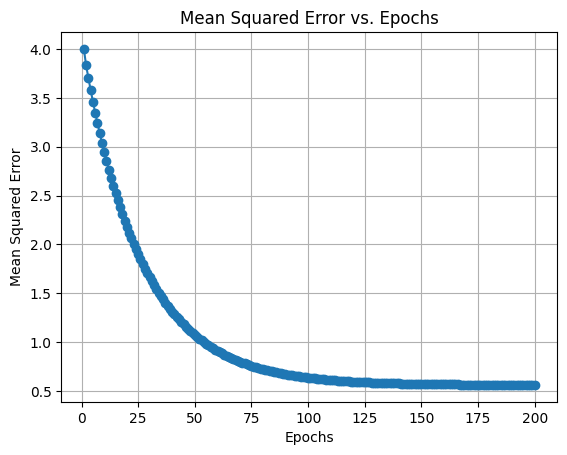

In [9]:
plt.plot(range(1, len(adaline.cost_) + 1), adaline.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Epochs')
plt.grid()
plt.show()

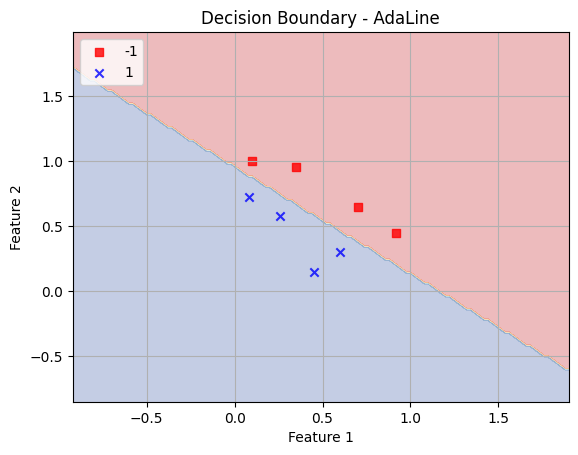

In [10]:
plot_decision_regions(X, y, classifier=adaline)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left')
plt.title('Decision Boundary - AdaLine')
plt.grid()
plt.show()

### AdaLine

In [11]:
# Define the fitness function
def fitness_function(individual):
    adaline = AdalineGD(eta=individual[0], n_iter=int(individual[1]))
    adaline.fit(X, y)
    accuracy = adaline.accuracy(X, y)
    return accuracy,

# Define GA parameters
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("eta", np.random.uniform, 0.01, 0.1)
toolbox.register("n_iter", np.random.randint, 50, 200)
toolbox.register("individual", tools.initCycle, creator.Individual, (toolbox.eta, toolbox.n_iter), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", fitness_function)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Initialize population
population = toolbox.population(n=50)

# Run the genetic algorithm
algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=50, verbose=True)

# Get the best individual
best_individual = tools.selBest(population, k=1)[0]
print("Best individual:", best_individual)
adaline_ga = AdalineGD(eta=best_individual[0], n_iter=best_individual[1])
adaline_ga.fit(X, y)
accuracy_ga = adaline_ga.accuracy(X, y)
print(f'Accuracy: {accuracy_ga:.2f}%')

gen	nevals
0  	50    


c:\Users\Andreas Christianto\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\Andreas Christianto\AppData\Local\Temp\ipykernel_13664\4254016482.py:17: RuntimeWarning: overflow encountered in square
  cost = (errors ** 2).sum() / 2.0


1  	38    
2  	33    
3  	34    
4  	21    
5  	35    
6  	32    
7  	34    
8  	25    
9  	27    
10 	34    
11 	29    
12 	33    
13 	40    
14 	32    
15 	25    
16 	36    
17 	20    
18 	29    
19 	21    
20 	25    
21 	37    
22 	25    
23 	24    
24 	29    
25 	33    
26 	32    
27 	28    
28 	31    
29 	23    
30 	36    
31 	30    
32 	31    
33 	33    
34 	26    
35 	32    
36 	31    
37 	39    
38 	30    
39 	29    
40 	27    
41 	29    
42 	33    
43 	32    
44 	32    
45 	34    
46 	32    
47 	34    
48 	30    
49 	34    
50 	30    
Best individual: [0.12213884040373786, 130.95872547306035]
Accuracy: 100.00%


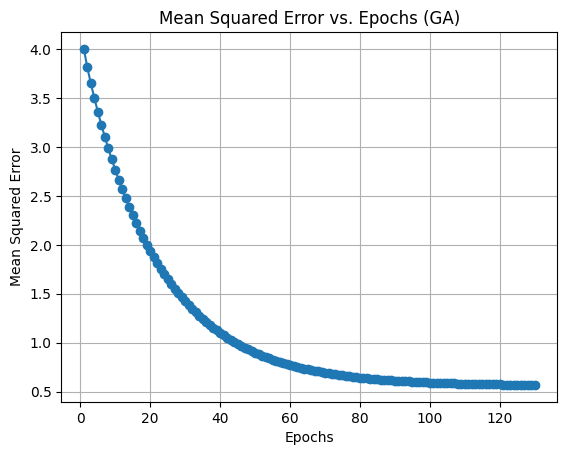

In [12]:
# Plot MSE Curve for GA
plt.plot(range(1, len(adaline_ga.cost_) + 1), adaline_ga.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Epochs (GA)')
plt.grid()
plt.show()

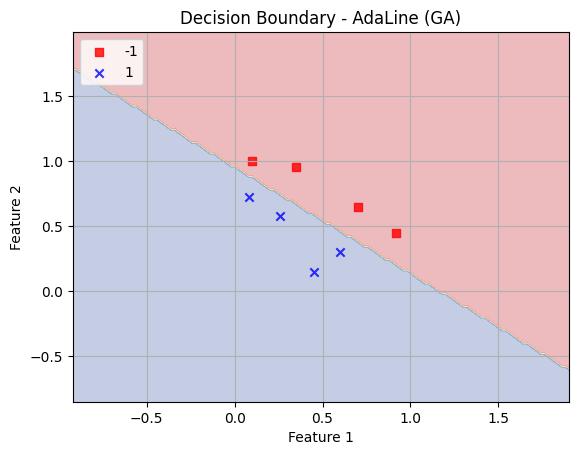

In [13]:
# Plot Decision Boundary for GA
plot_decision_regions(X, y, classifier=adaline_ga)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left')
plt.title('Decision Boundary - AdaLine (GA)')
plt.grid()
plt.show()

### PSO

In [14]:
# Define the fitness function
def fitness_function(x, X, y):
    eta = x[0][0]  # Accessing the first element of the first dimension
    n_iter = int(x[0][1])
    adaline = AdalineGD(eta=eta, n_iter=n_iter)
    adaline.fit(X, y)
    accuracy = adaline.accuracy(X, y)
    return -accuracy  # PSO minimizes the function, so we negate the accuracy

# Define PSO parameters
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

# Set the lower and upper bounds for eta and n_iter
lb = np.array([0.01, 50])
ub = np.array([0.1, 200])

# Create the optimizer
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=2, options=options, bounds=(lb, ub))

# Perform optimization
best_cost, best_params = optimizer.optimize(fitness_function, iters=50, X=X, y=y)

# Print the results
print("Optimized parameters: eta={}, n_iter={}".format(best_params[0], int(best_params[1])))
print("Best accuracy:", -best_cost)

adaline_pso = AdalineGD(eta=best_params[0], n_iter=int(best_params[1]))
adaline_pso.fit(X, y)
accuracy_pso = adaline_pso.accuracy(X, y)
print(f'Accuracy: {accuracy_pso:.2f}%')

2024-05-28 14:15:30,281 - pyswarms.single.global_best - INFO - Optimize for 50 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|50/50, best_cost=-100
2024-05-28 14:15:31,089 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -100.0, best pos: [5.0293737e-02 1.6581066e+02]


Optimized parameters: eta=0.0502937370473167, n_iter=165
Best accuracy: 100.0
Accuracy: 100.00%


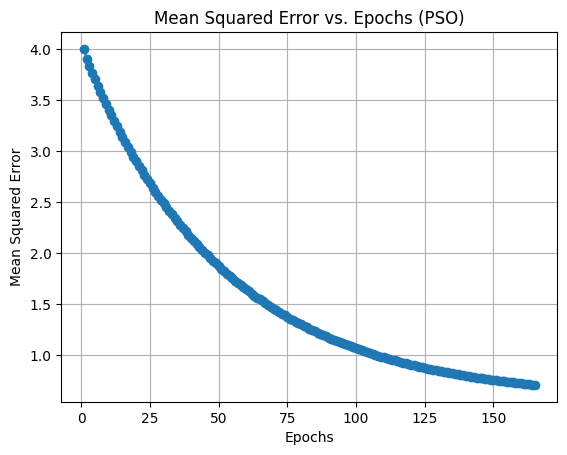

In [15]:
# Plot MSE Curve for PSO
plt.plot(range(1, len(adaline_pso.cost_) + 1), adaline_pso.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Epochs (PSO)')
plt.grid()
plt.show()

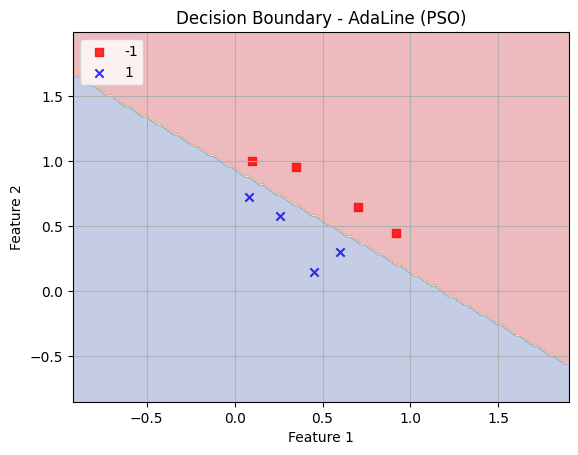

In [16]:
# Plot Decision Boundary for PSO
plot_decision_regions(X, y, classifier=adaline_pso)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left')
plt.title('Decision Boundary - AdaLine (PSO)')
plt.grid()
plt.show()